In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
# 1. What is the average age of the individuals in the dataset?
df['Age'].mean()

48.02884615384615

[Text(0, 0, '328'), Text(0, 0, '192')]

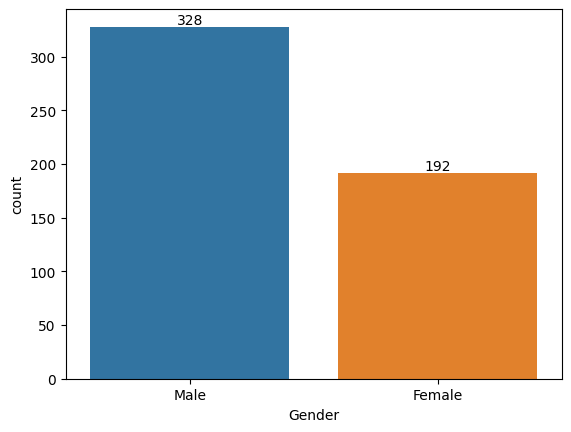

In [6]:
# 2. How many males and females are present in the dataset?
import seaborn as sns

plot = sns.countplot(data = df, x='Gender')
plot.bar_label(plot.containers[0])

In [7]:
# 3. What percentage of individuals in the dataset have Polyuria?
(df['Polyuria']=='Yes').sum()/df.shape[0] *100

49.61538461538461

Text(0.5, 1.0, 'Sudden weight loss')

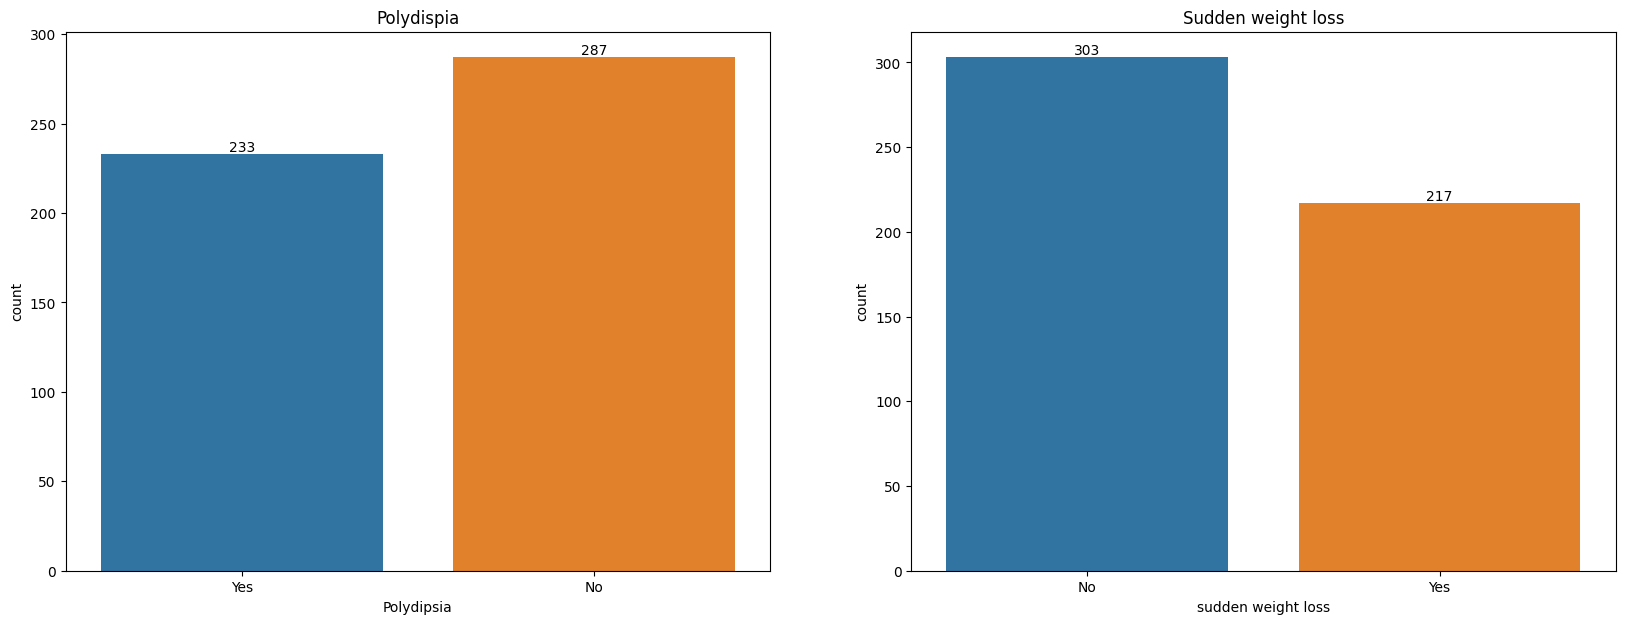

In [8]:
# 4. What is the most common symptom among the patients: Polydipsia or sudden weight loss?

import matplotlib.pyplot as plt

df_positive = df[df['class']=='Positive'].copy()
plot, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

plt1 = sns.countplot(data=df, x='Polydipsia', ax=axes[0])
plt1.bar_label(plt1.containers[0])
axes[0].set_title('Polydispia')

plt2 = sns.countplot(data=df, x='sudden weight loss', ax=axes[1])
plt2.bar_label(plt2.containers[0])
axes[1].set_title('Sudden weight loss')

# sudden weight loss is more common indicator

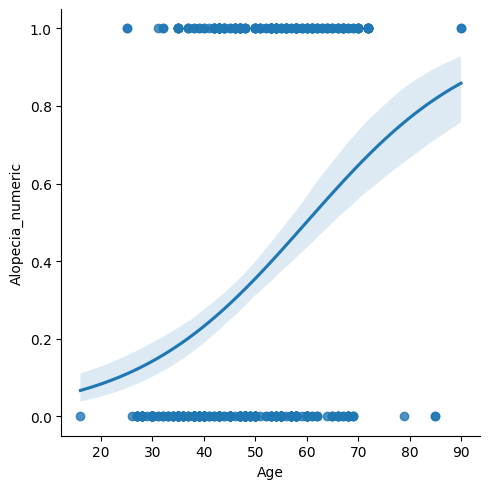

In [9]:
# 5. Is there a correlation between age and the presence of Alopecia?
df['Alopecia_numeric'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
sns.lmplot(data = df, x='Age', y='Alopecia_numeric', logistic=True)

In [10]:
# 6. How many individuals in the dataset have both Polyuria and Polydipsia?
df[(df['Polyuria']=='Yes') & (df['Polydipsia']=='Yes')].shape[0]

193

[Text(0, 0, '320'), Text(0, 0, '200')]

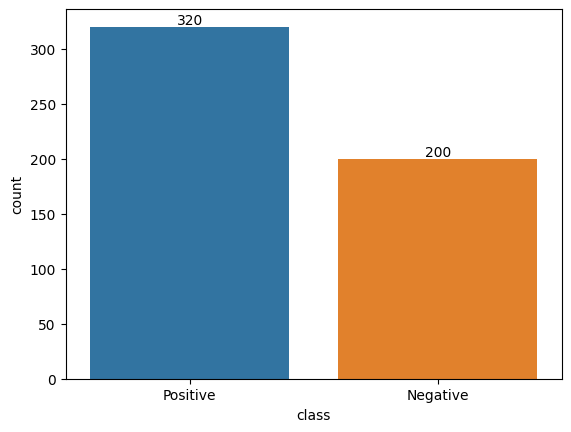

In [11]:
# 7. Create a count plot of the 'class' variable to visualize the distribution of positive and negative cases.
plot =sns.countplot(data=df, x='class')
plot.bar_label(plot.containers[0])

[Text(0, 0, '145'), Text(0, 0, '175')]

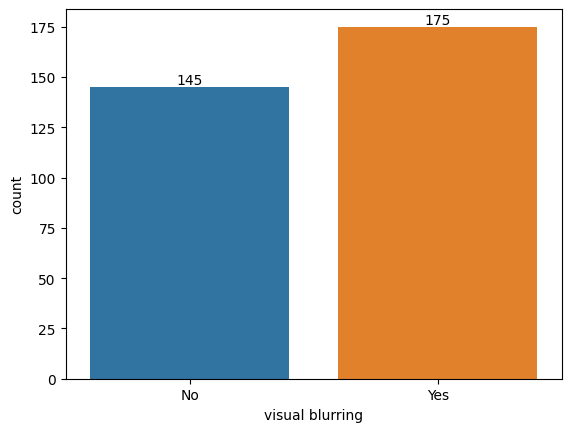

In [12]:
# 8. What is the distribution of the 'visual blurring' variable among individuals with diabetes?
plot = sns.countplot(data=df_positive, x='visual blurring')
plot.bar_label(plot.containers[0])

In [13]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class', 'Alopecia_numeric'],
      dtype='object')

## Diabetes Prediction

In [14]:
# 9. Build a classification model to predict the 'class' variable (diabetes).

df_numeric = df.drop('Alopecia_numeric', axis=1).copy()

In [15]:
# 9.a encoding

encoder = lambda x: 1 if x.lower() in ('positive', 'yes') else 0
for feature in df_numeric.columns:
    if df_numeric[feature].dtype == 'object':
        df_numeric[feature] = df_numeric[feature].apply(encoder)

In [16]:
df_numeric.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

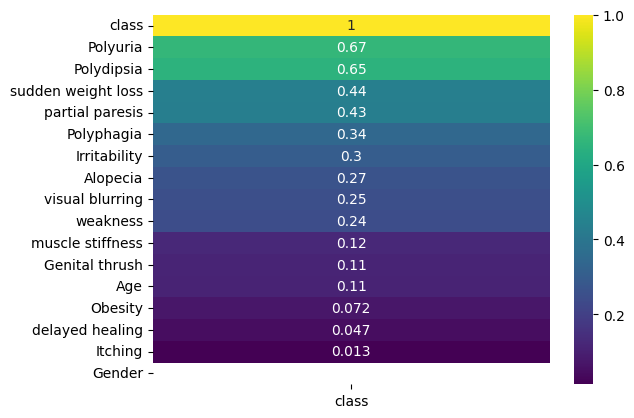

In [17]:
# feature selection
corr = df_numeric.corr()['class']
corr = corr.abs().sort_values(ascending=False)
sns.heatmap(data =corr.to_frame(), annot=True, cmap='viridis')

In [18]:
threshold = .05
features_less_than_threshold = corr[abs(corr) < threshold].index
print(f"Dropping these features: {features_less_than_threshold}")
df_numeric.drop(features_less_than_threshold, inplace=True, axis=1)

Dropping these features: Index(['delayed healing', 'Itching'], dtype='object')


In [19]:
# 9.c splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop('class', axis=1), df_numeric['class'], test_size = .2)

In [20]:
X_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia,Obesity
439,49,0,1,1,0,1,0,0,1,0,0,0,0,0
226,37,0,0,0,0,0,0,0,0,0,0,0,0,0
357,33,0,0,0,0,0,0,0,0,0,0,0,0,0
125,55,0,1,1,1,1,1,0,1,0,1,0,0,0
301,47,0,0,0,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,53,0,1,0,1,0,0,0,0,0,1,0,0,0
228,45,0,0,0,0,1,0,0,0,1,1,0,0,0
414,55,0,1,1,1,1,0,0,1,0,1,0,0,1
7,66,0,1,1,1,1,0,0,1,1,1,1,0,0


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score

classifiers = [RandomForestClassifier, DecisionTreeClassifier]
pipes = {}
max_score = 0
best_classifier = ""

for classifier in classifiers:
    current_classifier = classifier.__name__
    pipe = Pipeline([
        ("scaler", MinMaxScaler() ),
        ("classifier", classifier())
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    pipes[current_classifier] = pipe
    score = accuracy_score(y_test, y_pred)

    if max_score < score:
        max_score = score
        best_classifier = current_classifier

    print(f"Accuracy score with {current_classifier} is: {score}")

print(f"And the best classifier to predict diabetes and potentially save lives is: {best_classifier}")

Accuracy score with RandomForestClassifier is: 0.9615384615384616
Accuracy score with DecisionTreeClassifier is: 0.9519230769230769
And the best classifier to predict diabetes and potentially save lives is: RandomForestClassifier


In [22]:
import pickle

# Export MinMaxScaler
with open('min_max_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(pipes[best_classifier]['scaler'], scaler_file)

# Export RandomForestClassifier
with open('random_forest_classifier.pkl', 'wb') as classifier_file:
    pickle.dump(pipes[best_classifier]['classifier'], classifier_file)
